In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:20<00:00, 22.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [9]:
pip install tqdm

In [10]:
pip install tensorflow


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [14]:
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [16]:
#Visualization
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})


100%|██████████| 9999/9999 [00:05<00:00, 1869.44it/s]


In [17]:
data.shape

(22564, 2)

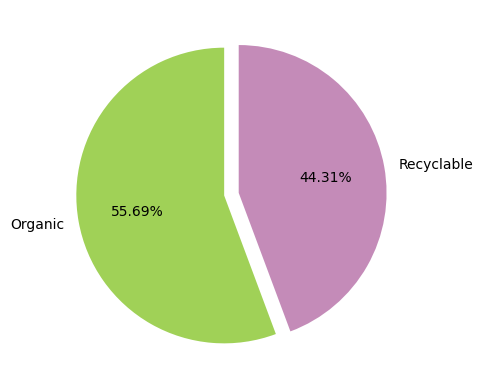

In [18]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])
plt.show()


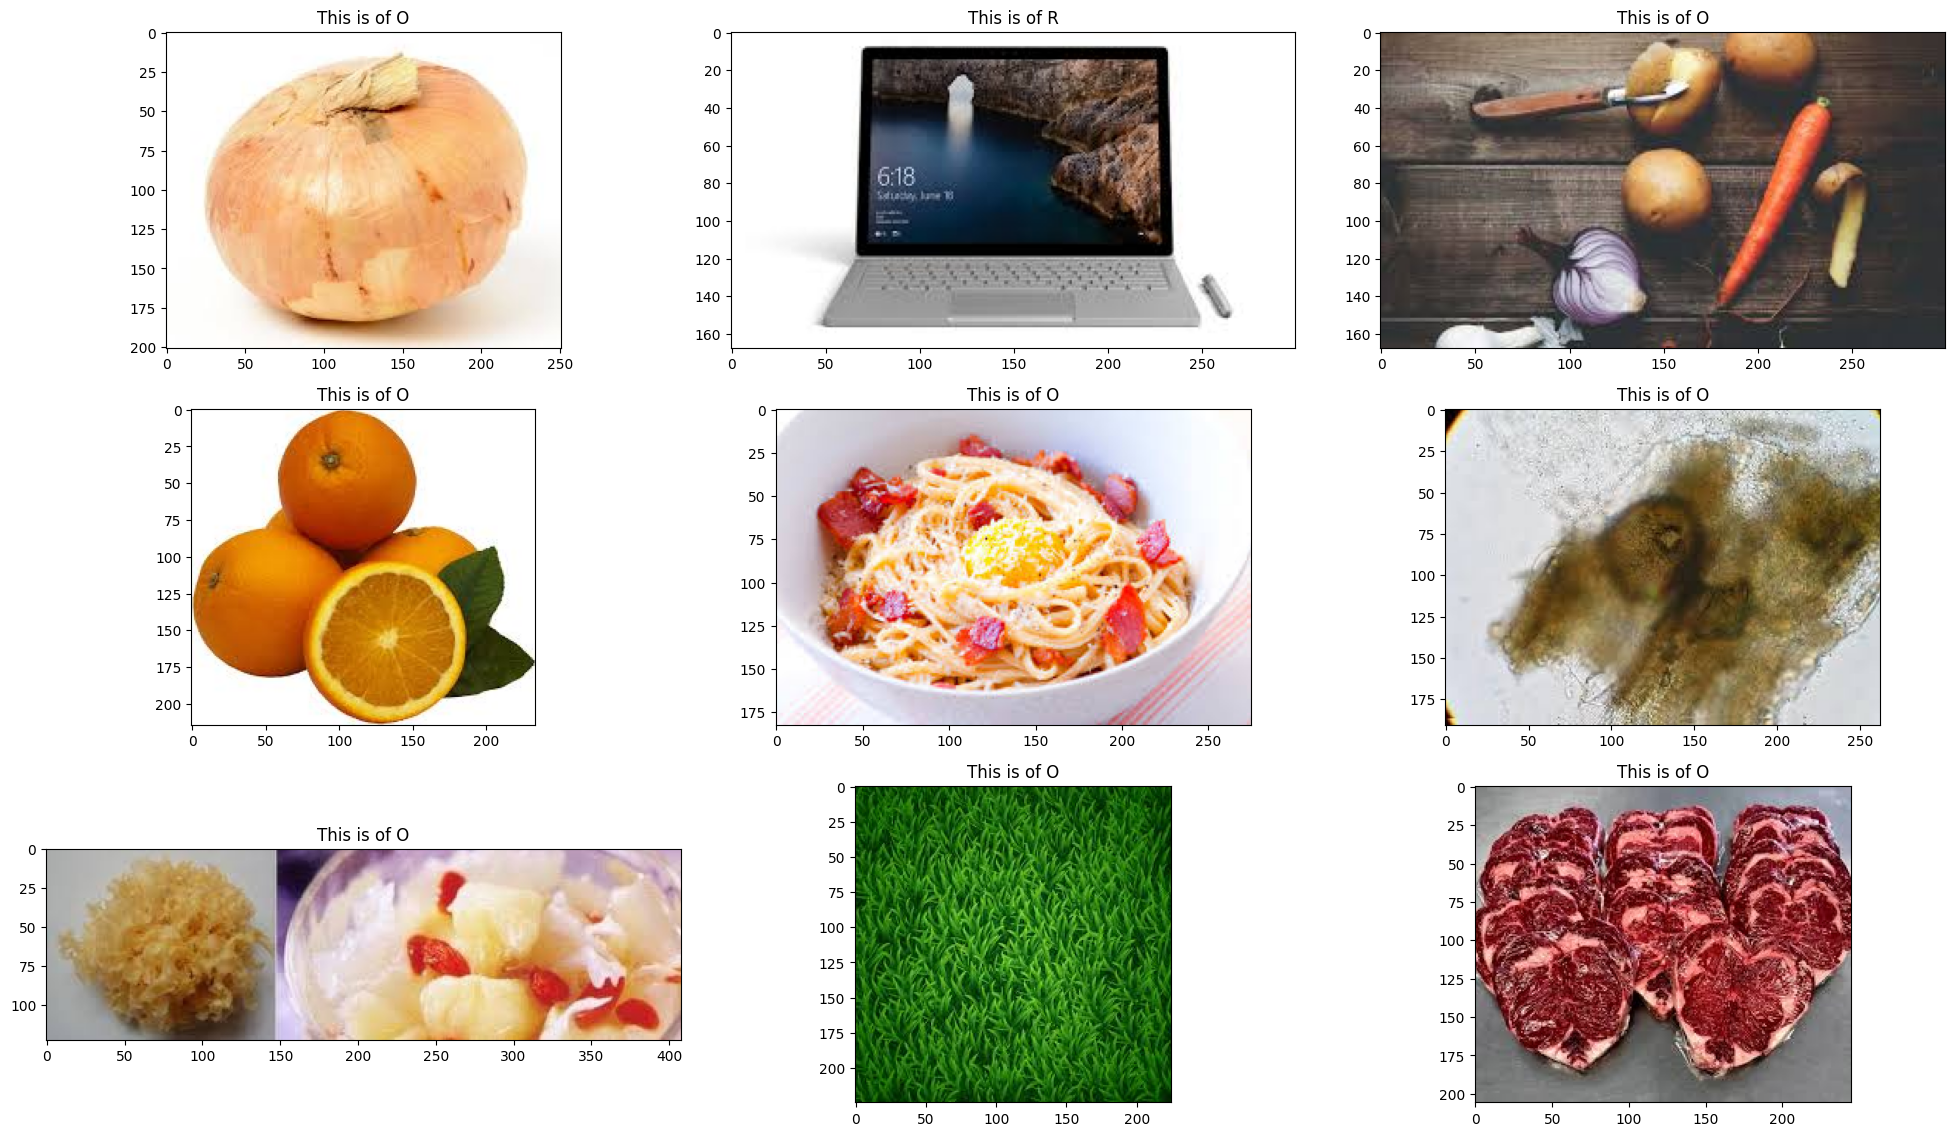

In [19]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [21]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics=["accuracy"])
batch_size=64



In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [24]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [25]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [28]:
hist=model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 64s 180ms/step - accuracy: 0.8111 - loss: 0.4480 - val_accuracy: 0.8762 - val_loss: 0.3269
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.8514 - loss: 0.3709 - val_accuracy: 0.8961 - val_loss: 0.2839
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.8663 - loss: 0.3356 - val_accuracy: 0.8723 - val_loss: 0.3228
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 53s 150ms/step - accuracy: 0.8746 - loss: 0.3085 - val_accuracy: 0.8918 - val_loss: 0.2763
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.8902 - loss: 0.2811 - val_accuracy: 0.8953 - val_loss: 0.2902
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.9092 - loss: 0.2428 - val_accuracy: 0.9089 - val_loss: 0.2949
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.9202 - loss: 0.2062 - val_accuracy: 0.8969 - val_loss: 0.3300
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 155ms/step - accuracy: 0.9461 - loss: 0